___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
df = pd.read_csv("advertising.csv")

**Check the head of ad_data**

In [4]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


** Use info and describe() on ad_data**

In [5]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

<AxesSubplot: xlabel='Age', ylabel='Count'>

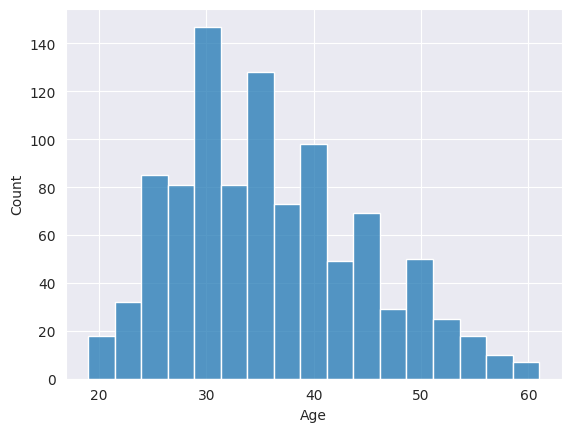

In [6]:
sns.histplot(data=df, x='Age')

**Create a jointplot showing Area Income versus Age.**

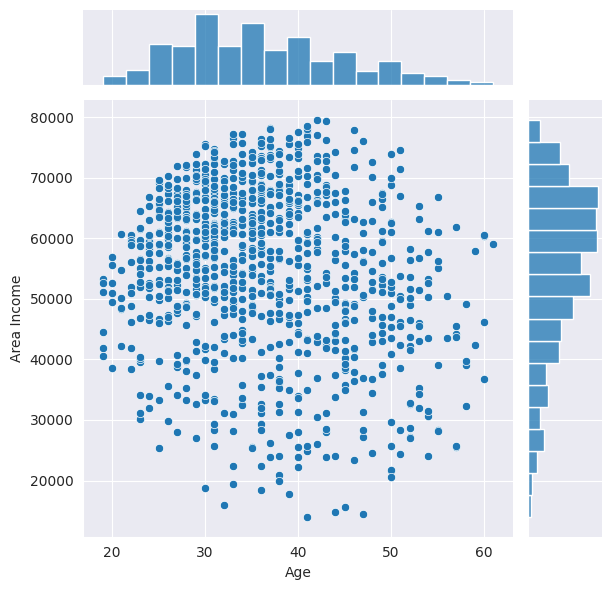

In [7]:
sns.jointplot(data=df, x='Age', y='Area Income')

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

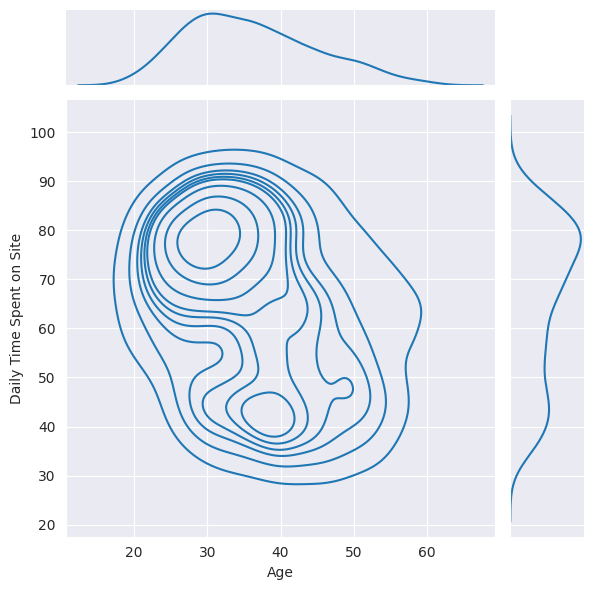

In [9]:
sns.jointplot(data=df, x='Age', y='Daily Time Spent on Site', kind='kde')

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

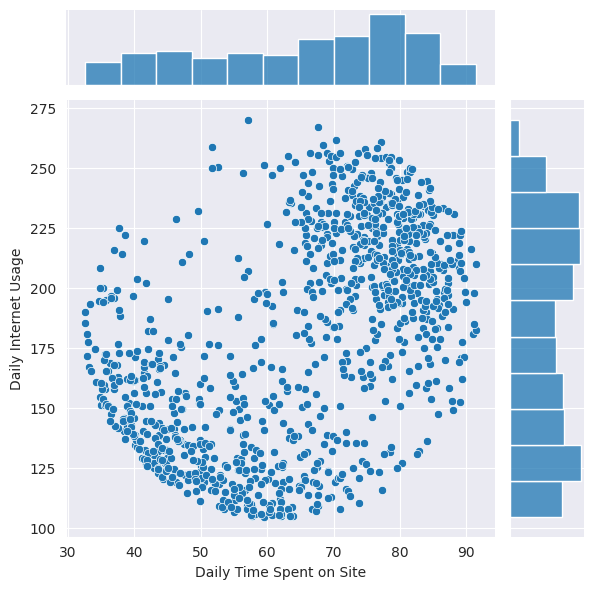

In [10]:
sns.jointplot(data=df, x='Daily Time Spent on Site', y='Daily Internet Usage')

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

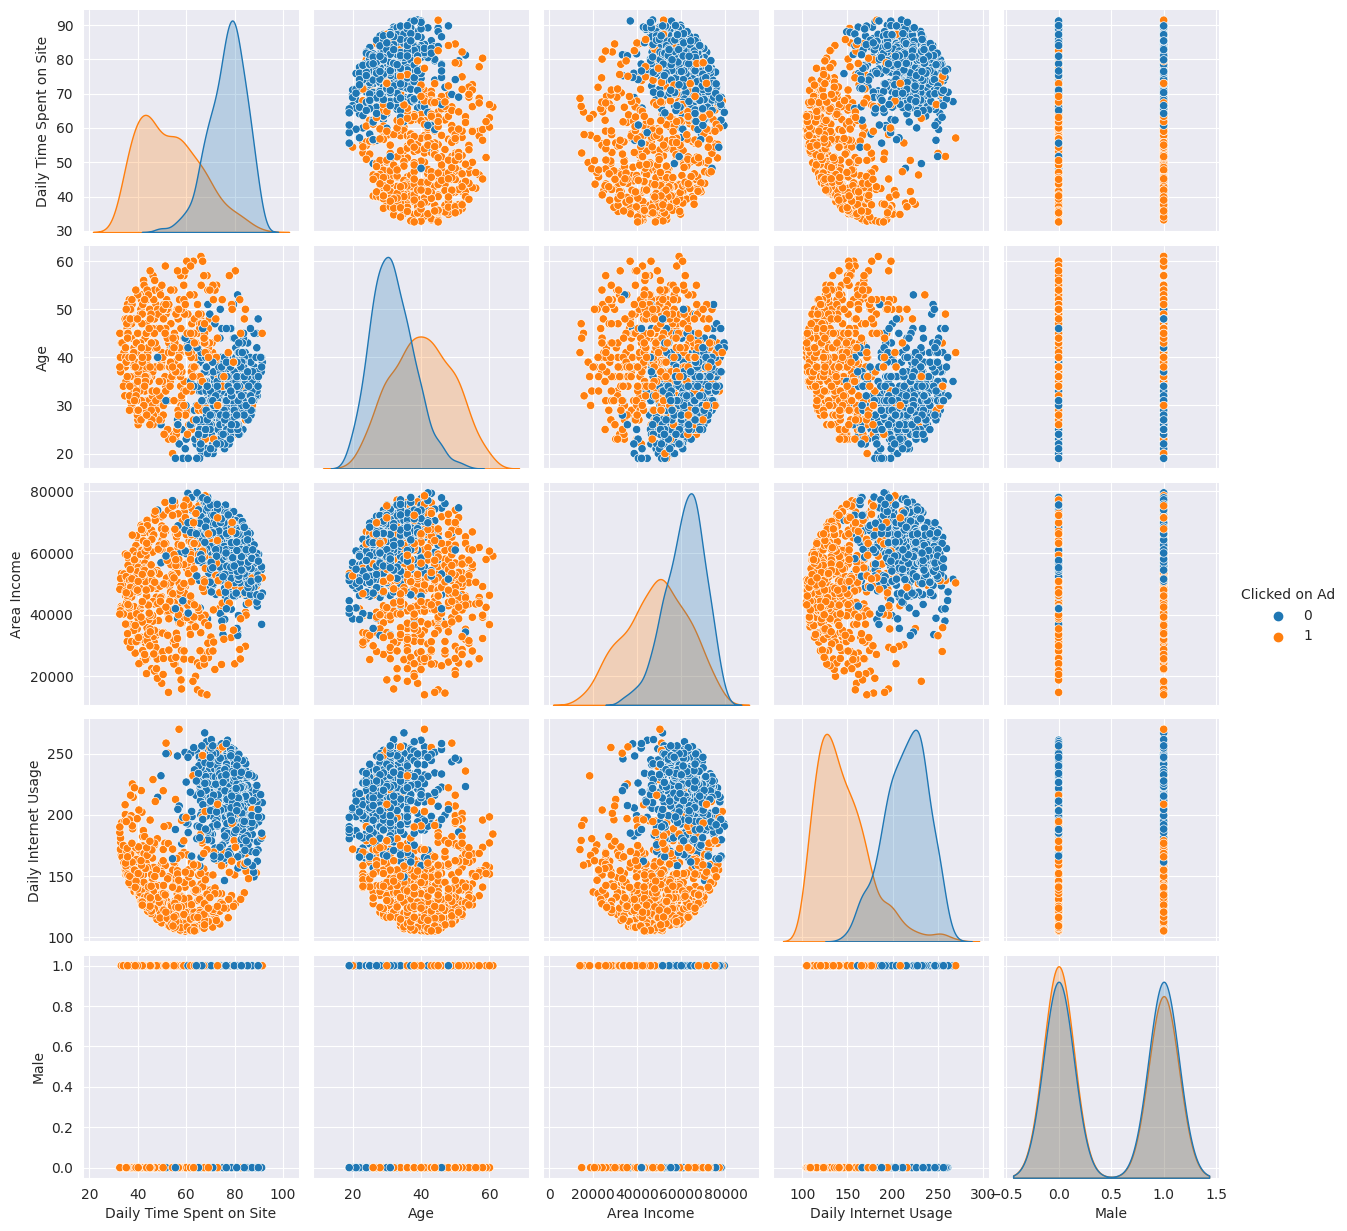

In [11]:
sns.pairplot(df, hue='Clicked on Ad')

<AxesSubplot: >

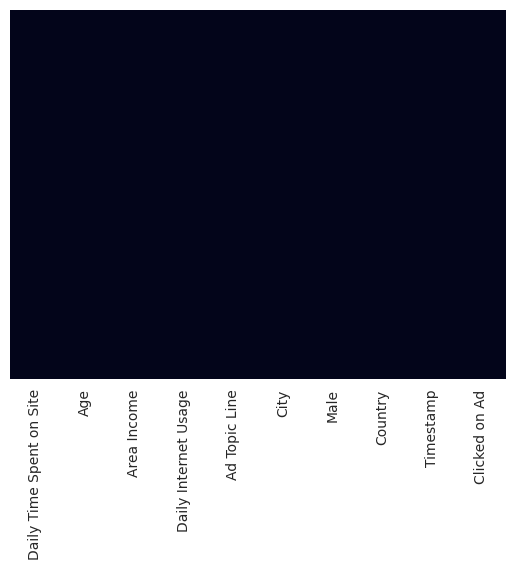

In [12]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [14]:
## At this stage it would be hard for me to do same sophisticated feature extraction, but I can extract day of the week, and maybe do smoe time of day column

In [28]:
import datetime

In [29]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [36]:
df['Weekday'] = df['Timestamp'].apply(lambda x: x.strftime("%a"))
df['Hour'] = df['Timestamp'].apply(lambda x: x.hour)

In [38]:
def get_time_of_day(dt):
    h = dt.hour

    if h < 7:
        return 'night'
    elif h < 13:
        return 'morning'
    elif h < 19:
        return 'afternoon'
    else:
        return 'evening'

In [39]:
df["Time of day"] = df["Timestamp"].apply(get_time_of_day)

In [40]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Weekday,Hour,Time of day
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,Sun,0,night
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,Mon,1,night
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,Sun,20,evening
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,Sun,2,night
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,Fri,3,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,Thu,21,evening
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,Fri,2,night
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,Mon,17,afternoon
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,Thu,2,night


In [45]:
X_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']

In [43]:
dummies_df = pd.get_dummies(df[['Weekday', 'Time of day']], drop_first=True)

In [46]:
X = pd.concat([df[X_cols], dummies_df], axis=1)

In [47]:
X

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thu,Weekday_Tue,Weekday_Wed,Time of day_evening,Time of day_morning,Time of day_night
0,68.95,35,61833.90,256.09,0,0,0,1,0,0,0,0,0,1
1,80.23,31,68441.85,193.77,1,1,0,0,0,0,0,0,0,1
2,69.47,26,59785.94,236.50,0,0,0,1,0,0,0,1,0,0
3,74.15,29,54806.18,245.89,1,0,0,1,0,0,0,0,0,1
4,68.37,35,73889.99,225.58,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,0,0,0,1,0,0,1,0,0
996,51.30,45,67782.17,134.42,1,0,0,0,0,0,0,0,0,1
997,51.63,51,42415.72,120.37,1,1,0,0,0,0,0,0,0,0
998,55.55,19,41920.79,187.95,0,0,0,0,1,0,0,0,0,1


In [48]:
y = df['Clicked on Ad']

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

** Train and fit a logistic regression model on the training set.**

In [55]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

## Predictions and Evaluations
** Now predict values for the testing data.**

In [56]:
predictions = lr.predict(X_test)

** Create a classification report for the model.**

In [57]:
print(confusion_matrix(y_test, predictions))

[[86  3]
 [12 99]]


In [58]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        89
           1       0.97      0.89      0.93       111

    accuracy                           0.93       200
   macro avg       0.92      0.93      0.92       200
weighted avg       0.93      0.93      0.93       200

